In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, tan, arctan, exp, log, pi, array, linspace, arange, sqrt, meshgrid
from numpy.linalg import norm
from mpl_toolkits import mplot3d

%matplotlib widget

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    'figure.figsize': (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [3]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

### Examples

For each plot below, sketch the gradient field, identify critical points, and mark them as having a local max, local min, or neither. 

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10, 5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: 20*exp(-(x**2 + y**2)) - 15* exp(-2 *((x - 1)**2 + (y - 3/4)**2)) - 18 *exp(-2 *((x - 1)**2 + (y + 1/2)**2))
    g = lambda x,y: 10*x**2
    h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
    k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)
    
    drop = Dropdown(options={"f": f,"g":g,"h":h,"k":k})
    func = drop.value
    
    check1 = Checkbox(description="graph", value=False)
    graph = check1.value    
    check2 = Checkbox(description="gradient", value=False)
    quiver = check2.value

    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-3/2,3/2]);    
        
    getattr(ax,f"set_zlabel")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    # ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    # ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    
    def update(change):
        func = drop.value
        graph = check1.value
        quiver = check2.value
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        Z = func(X,Y)
        if graph:
            ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        if quiver:
            ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        
    drop.observe(update, names='value')
    check1.observe(update, names='value')
    check2.observe(update, names='value')
    
    return widgets.VBox([HBox([drop, check1, check2]), fig.canvas])

a("More examples")

<p style="padding-bottom:40%;"> </p>

## Exercise

Find all critical points of the function below.

$$f(x,y) = x^4+y^4-4x y+1$$

#### Solution

$$\nabla f = \bv{4x^3 - 4y \\ 4y^3 - 4x} = \bv{0 \\ 0} $$

Subbing $y = x^3$ into the second equation (and clearing the 4s). 

$$ x^9 - x = x(x^8 - 1) = x(x^4 - 1)(x^4 + 1) = x(x^2 - 1)(x^2 + 1)(x^4 + 1) = x(x - 1)(x + 1)(x^2 + 1)(x^4 + 1) $$

So $x = 0, 1, -1$ are the 3 solutions, and with the first equation, the 3 critical points are $(0, 0)$, $(1, 1)$, and $(-1, -1)$. 

#### 
<p style="padding-bottom:40%;"> </p>

## Exercise

Use the second derivative test to classify the critical points $(-1,-1)$, $(0,0)$, and $(1,1)$ in the example above.

$$f(x,y) = x^4+y^4-4x y+1$$

#### Solution

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10, 5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: x**4+y**4-4*x *y+1
    g = lambda x,y: 10*x**2
    h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
    k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)
    
    drop = Dropdown(options={"f": f,"g":g,"h":h,"k":k})
    func = drop.value
    
    check1 = Checkbox(description="graph", value=False)
    graph = check1.value    
    check2 = Checkbox(description="gradient", value=False)
    quiver = check2.value

    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-3/2,3/2]);    
        
    getattr(ax,f"set_zlabel")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    # ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    # ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    
    def update(change):
        func = drop.value
        graph = check1.value
        quiver = check2.value
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        Z = func(X,Y)
        if graph:
            ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        if quiver:
            ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        
    drop.observe(update, names='value')
    check1.observe(update, names='value')
    check2.observe(update, names='value')
    
    return widgets.VBox([HBox([check1, check2]), fig.canvas])

a("Further examples")

$$D = \begin{vmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{vmatrix} = \begin{vmatrix} 12x^2 & -4 \\ -4 & 12y^2 \end{vmatrix} = 144x^2y^2 - 16 $$

For $(0, 0)$, $D = -16 < 0$, so it is a saddle point.

For $(\pm 1, \pm1)$, $D = 128 > 0$ and $f_{xx} = 12$, so local minima occur here.


####
<p style="padding-bottom:40%;"> </p>

## Exercise

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

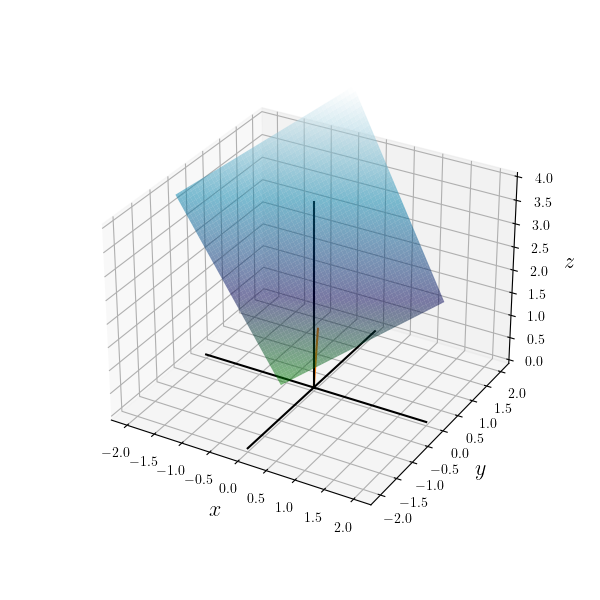

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')

    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');
    return fig.canvas

a("Closest point on a plane")


#### 
<p style="padding-bottom:40%;"> </p>

#### Solution

target: $f(x, y) = |\langle x, y, x - 2y + 3 \rangle |^2 = x^2 + y^2 + (x - 2y + 3)^2 = 2x^2 + 5y^2 - 4xy + 6x - 12 y + 9$

constraint: none. 

As this is an unconstrained problem ($x, y$ chosen for all of open set $\mathbb R^2$), we look for critical points.

$$\nabla f = \bv{4x - 4y + 6  \\ -4x + 10y - 12} = \bv{0 \\ 0} $$

Add the 2 equations together to get $6y - 6 = 0$, so $y = 1$ and $4x - 4 + 6 = 0$ so $x = -\frac12$. 

Plugging back into the equation of the plane $z = x - 2y + 3 = \frac12$ gives the closest point $\left(-\frac12, 1, \frac12 \right)$.

We know this is a minimum as it is the only critical point of $f$ and $f \to \infty$ as $x$ or $y$ tend to $\pm \infty$.